# Алгоритмы классификации

## MNIST Digits

Воспользуйтесь данными с https://www.kaggle.com/c/digit-recognizer/data 
Далее предполагается, что файлы test.csv и train.csv расположены в одной директории с notebook-ом.

В задании для оценивания качества работы алгоритмов требуется (самостоятельно) реализовать 10-тикратную перекрестную проверку (https://en.wikipedia.org/wiki/Cross-validation_(statistics)). В качестве ошибки используется средняя доля ошибок. Один раз (для kNN) в методических целях требуется дополнительно найти среднюю ошибку на обучающей части выборок перекрестной проверки. 

Разбиение на подвыборки должно быть одинаково для всех алгоритмов.

### Метод kNN

In [1]:
# примените метод kNN
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# нарисовать графики зависимости ошибки перекрестной проверки на обучающей части и на тестовой части от k.
# Сделать вывод об оптимальном k.
# (*) какие еще параметры влияют на результат классификации и как?

In [15]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate as cv

train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

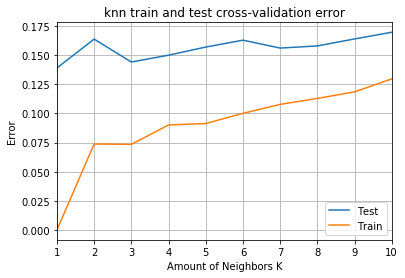

In [16]:
train_error = [0,]
test_error = [0,]

neighbors = range(1, 11)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cv(knn, X, y, cv=10, return_train_score=True)
    test_error.append(1 - np.array(scores['test_score']).mean())
    train_error.append(1 - np.array(scores['train_score']).mean())

plt.title('knn train and test cross-validation error')
plt.plot(test_error, label='Test')
plt.plot(train_error, label='Train')
plt.xlim([1, 10])
plt.xlabel('Amount of Neighbors K')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

In [17]:
optimal_test_k = neighbors[test_error[2:].index(min(test_error[2:]))] + 1
optimal_train_k = neighbors[train_error[2:].index(min(train_error[2:]))] + 1
print('Optimal test k =', optimal_test_k, 'with error =', min(test_error[2:]), end='.\n')
print('Optimal train k =', optimal_train_k, 'with error =', min(train_error[2:]), end='.\n')

Optimal test k = 3 with error = 0.144162016395.
Optimal train k = 3 with error = 0.0734474876125.


На результат классификации главным образом влияет параметр amount, то есть количество данных, которые мы
скармливаем функции нашего метода. Так, если  при amount = 150 минимальным k (помимо 1) является как 3, так и 5,
то при amount > 500 уже в явном виде в k = 3 есть минимальная ошибка. Также не менее важно выбрать оптимальное количество соседей, ведь, как видно из графика, при большем k появляется и большая ошибка.

### Метод SVM

In [18]:
# примените метод SVM
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от регуляризации C (log масштаб перебора по C).
# Сделать вывод об оптимальном C.
# Что означают и как влияют параметры multi_class, fit_intercept, intercept_scaling, class_weight, random_state?
# Нарисуйте график зависимости числа опорных векторов как функцию от C

In [19]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score as cvs
from sklearn.svm import LinearSVC

train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

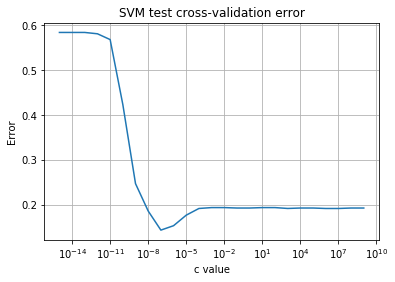

In [20]:
test_error = []
c_value = range(-15, 10)
for c in c_value:
    svc = LinearSVC(C=10**c)
    scores = cvs(svc, X, y, cv=10)
    test_error.append(1 - scores.mean())

fig = plt.figure()
plt.title('SVM test cross-validation error')
x_axis = [pow(10, i) for i in range(-15, 10)]
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x_axis, test_error)
ax.set_xscale('log')
plt.xlabel('c value')
plt.ylabel('Error')
plt.grid()
plt.show()

In [21]:
optimal_test_c = x_axis[test_error.index(min(test_error))]
print('Optimal test c value =', optimal_test_c, 'with error =', min(test_error), end='.\n')

Optimal test c value = 1e-07 with error = 0.143591525574.


Как видно из графика, при примерно $C = 10^{-7}$ мы получаем минимальную ошибку.

* __multi_class__ -- принимает 1 строковый параметр: "ovr" - один против всех, то есть каждому классу назначается один классификатор, тем самым решая задачу многоклассовости, разлагая её на серию бинарных задач; "crammer_singer" - гораздо менее эффективный алгоритм по времени, но аналогичный по результатам, решает задачу в изначальном виде.
* __fit_intercept__ -- используется для неотцентрированных данных на линейных моделях, так как на них разность на осях отлична от 0.
* __intercept_scaling__ -- регулирует смещение в линейной модели (т.к. в ней смещение постоянно).
* __class_weight__ -- позволяет установить $i$-му классу свой вес (по умолчанию 1).
* __random_state__ -- генератор псевдослучайных чисел, принимающий на вход int.

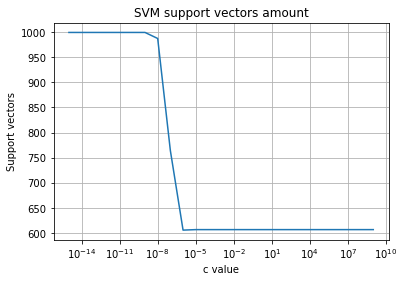

In [22]:
from sklearn.svm import SVC

vector_amount = []
c_value = range(-15, 10)
for c in c_value:
    svc = SVC(kernel="linear", C=10**c).fit(X, y)
    vector_amount.append(sum(svc.n_support_))

fig = plt.figure()
plt.title('SVM support vectors amount')
x_axis = [pow(10, i) for i in range(-15, 10)]
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x_axis, vector_amount)
ax.set_xscale('log')
plt.xlabel('c value')
plt.ylabel('Support vectors')
plt.grid()
plt.show()

### Метод DT

In [6]:
# примените метод DT
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Как влияют и что означают параметры max_depth, min_samples_split, min_samples_leaf, criteria на качество классификатора?
# Выбрать наилучшие значения параметров по вашим экспериментам

In [26]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as DTC

train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

In [35]:
score = cvs(DTC(), X, y, cv=10)
print("DT default error = ", 1 - score.mean())

DT default error =  0.356404311124


* __max_depth__ -- глубина дерева. Из экспериментов получилось, что для оптимальных значений глубина должна быть средней, т.к. с её ростом значительно ухудшается оценка.
* __min_samples_split__ -- устанавливает минимальное количество образцов (данных), которое должно находиться в одном из двух выходов каждого узла дерева.
* __min_samples_leaf__ -- устанавливает минимальное количество образцов (данных) на каждый лист дерева (то есть на самый низ).
* __criterion__ -- имеет два параметра: "gini" -- квадратичная метрика; "entropy" -- логарифмическая метрика. Первая, в отличие от второй, ускоряет вычисления (т.к. нет логарифма).

In [45]:
from sklearn.model_selection import GridSearchCV

dtc = DTC()
param = {'max_depth':[1, 2, 3, 5, 10], 'min_samples_split':[2, 3, 5, 10], 
        'min_samples_leaf':[2, 5, 20, 50, 100],'criterion':['gini','entropy']}
grid = GridSearchCV(dtc, param_grid=param, cv=10).fit(X, y)

In [46]:
print("best parameters:", grid.best_params_)
print("minimal error =", 1 - grid.best_score_)

best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 3}
minimal error = 0.333


### Метод NN

In [23]:
# примените метод NN
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
# Как влияет параметр hidden_layer_sizes на качество классификации?
# Выбрать наилучшее значение параметра по вашим экспериментам
# (***) воспользуйтесь NN из theano (http://deeplearning.net/software/theano/tutorial/ и http://deeplearning.net/tutorial/

In [38]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score as cvs
from sklearn.neural_network import MLPClassifier as MLPC
 
train_df = pd.read_csv('train.csv')

amount = 1000
X = np.array(train_df[:amount].drop(['label'], 1))
y = np.array(train_df[:amount]['label'])

In [41]:
print('error =', 1 - cvs(MLPC(), X, y, cv=10).mean())

error = 0.191338441762


* __hidden_layer_sizes__ -- для линейной модели достаточно лишь одного скрытого слоя, так как их увеличение заметно скажется на времени вычисления без существенного выигрыша в точности. Оптимальным количеством нейронов для слоя является среднее между входными и исходящими данными.

In [47]:
mean_errors = []
for i in range(50, 751, 50):
        score = cvs(MLPC(hidden_layer_sizes=(i,)), X, y, cv=10)
        mean_errors.append(1 - score.mean())

In [48]:
print(50 + 50 * np.argmin(mean_errors), min(mean_errors))

400 0.142759502165


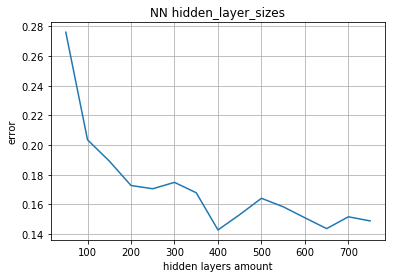

In [49]:
step = range(50, 751, 50)
plt.title('NN hidden_layer_sizes')
plt.xlabel('hidden layers amount')
plt.ylabel('error')
plt.plot(step, mean_errors)
plt.grid()
plt.show()

### Вывод

In [24]:
# Сделайте вывод о наилучшем методе и его оптимальных параметрах

Таким образом, наилучшим методом оказалась нейронная сеть, т.к. выдает минимальную ошибку с параметрами *hidden_layer_sizes=400*

In [25]:
# (*) Обучите наилучший метод с оптимальными параметрами на полной выборке,
# примените к тестовой выборке соревнования и загрузите результат на kaggle

In [2]:
import numpy as np
import pandas as pd
import csv
import pylab as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score as cvs
from sklearn.neural_network import MLPClassifier as MLPC
 
train_df = pd.read_csv('train.csv')

X = np.array(train_df.drop(['label'], 1))
y = np.array(train_df['label'])

In [3]:
total_score = cvs(MLPC(hidden_layer_sizes=(400,)), X, y, cv=10)

In [6]:
print("Total error =", 1 - total_score.mean())

Total error = 0.0373330648656
